In [1]:
import numpy as np 
import matplotlib.pyplot as plt


## parameters
We want interpretable penalty function for closeness to other drones.   

I propose: 
- '$d_min$' : min distance. *The distance at which penalty clamps to some max level, (the drone is basically crashed at this point)*
- '$d_{max}$' : max distance. *The distance at which penalty is clamped to $0$ (the drone is so far it should not matter at this point)*
- $\lambda$ *Some measure of how fast penalty gradient increases as distance gets lower*  

<!-- - max penalty *The penalty at min dist* (max p should be somehow dependent on target_pos_reward to not get out of balance with it -->

All units are in meters.  
$d_0$ is the size of the drone at a diagonal + 1cm for propellers

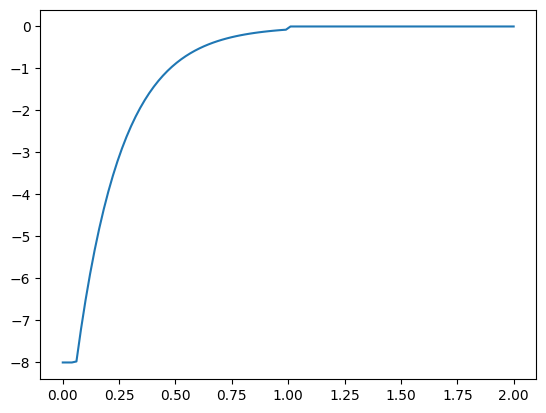

In [2]:
def distance_penalty(d, 
                     d_min = 0.06, 
                     d_max = 1, 
                     p_max = -8, 
                     lambda_= 5):
    if d < d_min:
        return p_max
    if d > d_max:
        return 0 
    return p_max * np.exp(-lambda_ * ( d - d_min))

n = 100
xs = np.linspace(0, 2, n)
ys = np.fromiter((distance_penalty(x) for x in xs), dtype=float )
plt.plot(xs,ys)

How does this interact with the goal distance reward?  
We want destination_reward > abs(closeness_penalty) when far away from other drones.  
And we want closeness_reward < abs(closeness_penalty) when near other drones.  
This is to avoid over-optimizing for the purpose of drone avoidance - when drones are far.  

So that it is easier to pursue the target even if there is a drone nearby.  

Right now the destination_reward looks something like this:


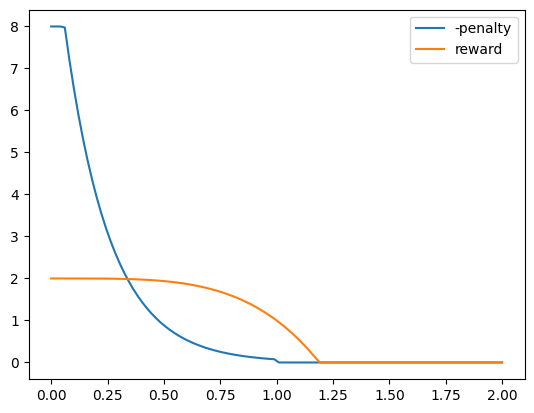

In [3]:
def destination_reward(dist):
    return max(0,2 - dist**4)

n = 100
xs = np.linspace(0, 2, n)
ys = np.fromiter((-distance_penalty(x) for x in xs), dtype=float )
plt.plot(xs,ys, label="-penalty")
plt.legend()
ys = np.fromiter((destination_reward(x) for x in xs), dtype=float )

plt.plot(xs,ys,label="reward")
plt.legend()

We see that we achieve the target effect more or less, but the clamping to $0$ makes reward harder because the gradient after 2 is constant, $\sqrt[4]{2}$ we can improve this by 

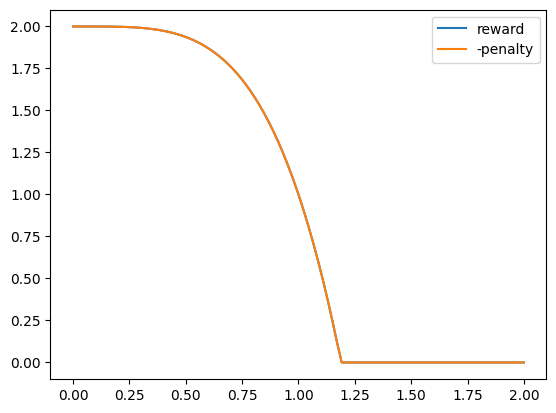

In [8]:
def destination_reward_new(dist):
    return max(0,2 - dist**2)

n = 100
xs = np.linspace(0, 2, n)
ys = np.fromiter((max(0,2 - x**4) for x in xs), dtype=float )
plt.plot(xs,ys,label="reward")
plt.legend()
ys = np.fromiter((max(0,2- x**4) for x in xs), dtype=float )

plt.plot(xs,ys, label="-penalty")
plt.legend()
plt.show()